## 라이브러리 호출

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [15]:
# json 불러오기
file_path = "../chunker/staria_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

staria = pd.DataFrame(data)

# 결과 확인
print(staria.head())


                                                text      type source_pages  \
0  안전 및 차량 손상 경고\n본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위...                    [1]   
1                                    선택 또는 미장착 사양 표시  subtitle          [1]   
2                                                  <  subtitle          [1]   
3  >\n본 취급설명서는 모든 트림 모델 및 선택 사양을 포함\n하여 설명하고 있습니다...  subtitle          [1]   
4                                        내용 찾기 방법 설명     title          [2]   

  model  
0  스타리아  
1  스타리아  
2  스타리아  
3  스타리아  
4  스타리아  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
staria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          50 non-null     object
 1   type          50 non-null     object
 2   source_pages  50 non-null     object
 3   model         50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [4]:
print(staria['type'].value_counts())
print("-"*50)
print(staria['source_pages'].value_counts())
print("-"*50)
print(staria['model'].value_counts())
print("-"*50)


type
title       33
subtitle    16
             1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          11
[1]                                                                                                                                                                                                                                                                                                                                                         

## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
staria_texts = staria['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
staria_tokenized = [okt.nouns(text) for text in staria_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
staria_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in staria_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
staria_flat_tokens = list(itertools.chain.from_iterable(staria_filtered_tokens))  # 리스트 평탄화
staria_word_freq = Counter(staria_flat_tokens)


# 6. 상위 50개 단어 출력
staria_top_n = 50
staria_top_words = staria_word_freq.most_common(staria_top_n)

# 출력
for word, freq in staria_top_words:
    print(f'{word}: {freq}')



차량: 1532
작동: 1212
상태: 1078
주행: 925
시동: 862
도어: 733
표시: 726
설정: 725
사용: 702
엔진: 682
좌석: 681
보조: 665
버튼: 656
기능: 610
브레이크: 600
키: 593
자동: 536
경고: 530
해제: 522
장치: 498
시스템: 498
속도: 485
조절: 480
점검: 466
주차: 453
타이어: 453
스마트: 420
위치: 417
타입: 416
페달: 386
운전: 378
고등: 376
주의: 369
전방: 367
차: 363
운전자: 362
변속: 355
충돌: 351
이상: 349
모드: 344
방지: 342
확인: 337
테: 337
판: 326
계기: 317
게이트: 316
안전: 309
에어백: 296
선택: 295
앞: 291


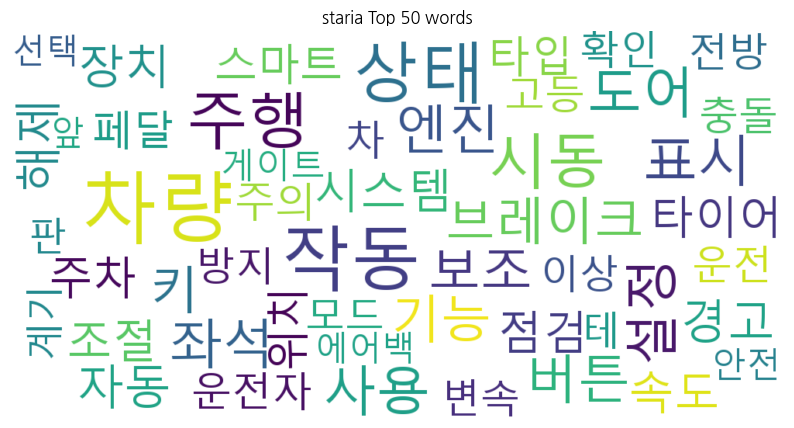

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
staria_top_words_dict = dict(staria_top_words)

# 2. 워드 클라우드 시각화
staria_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(staria_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(staria_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("staria Top 50 words")
plt.show()

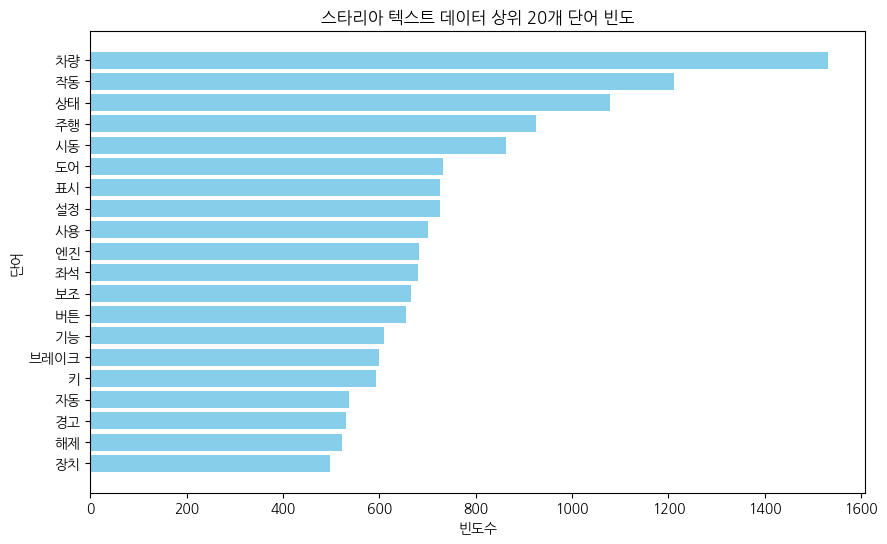

In [7]:
staria_top_words2 = staria_word_freq.most_common(20)
staria_top_words_dict2 = dict(staria_top_words2)
staria_words, staria_counts = zip(*staria_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(staria_words, staria_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('스타리아 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 4.0227
표시: 3.6702
장치: 2.8516
주행: 2.8256
작동: 2.4257
엔진: 2.4220
고등: 2.3948
좌석: 2.3789
시동: 2.2279
내용: 2.1672
상태: 2.0800
점검: 2.0536
방법: 2.0384
브레이크: 1.9218
사용: 1.8353
모드: 1.7492
타이어: 1.6543
결함: 1.6364
도어: 1.6044
자동: 1.5092
주의: 1.4721
시스템: 1.4683
스마트: 1.4366
보조: 1.4186
안전: 1.4113
해제: 1.3979
기능: 1.3756
게이트: 1.3569
명칭: 1.3548
설명: 1.3501
제작: 1.3477
사고: 1.3082
운전: 1.3014
버튼: 1.2969
색인: 1.2782
사양: 1.2476
조절: 1.2318
오일: 1.2171
설정: 1.2137
안내: 1.1605
경고: 1.1537
선택: 1.1288
사항: 1.0893
정보: 1.0867
타입: 1.0770
이상: 1.0442
자동차: 1.0289
안전벨트: 1.0102
기록: 1.0009
교체: 0.9864


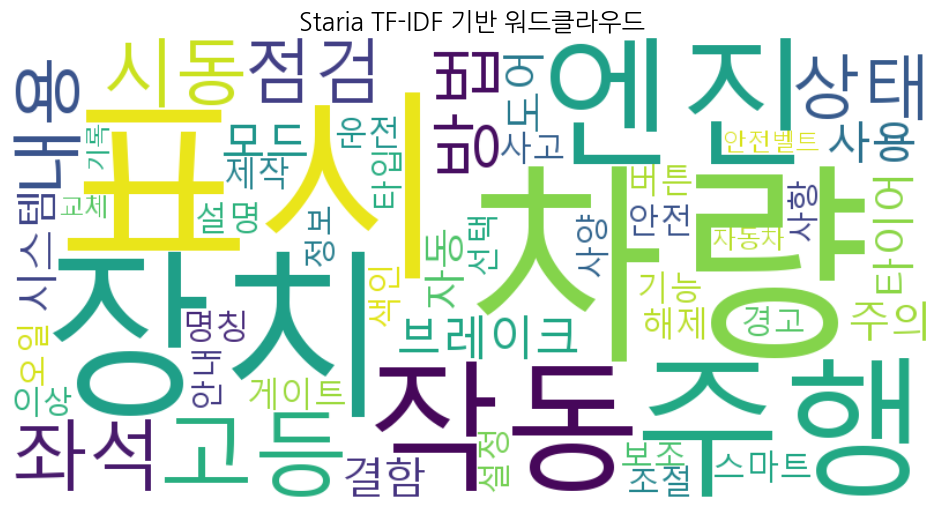

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
staria_docs = [' '.join(tokens) for tokens in staria_filtered_tokens]

# 2. TF-IDF 벡터화
staria_vectorizer = TfidfVectorizer()
staria_X = staria_vectorizer.fit_transform(staria_docs)

# 3. 단어와 점수 추출
staria_words = staria_vectorizer.get_feature_names_out()
staria_scores = staria_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
staria_word_scores = dict(zip(staria_words, staria_scores))

staria_top_50 = sorted(staria_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for staria_word, staria_score in staria_top_50:
    print(f"{staria_word}: {staria_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
staria_top_50_dict = dict(staria_top_50)

# 워드클라우드 생성
staria_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(staria_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(staria_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Staria TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

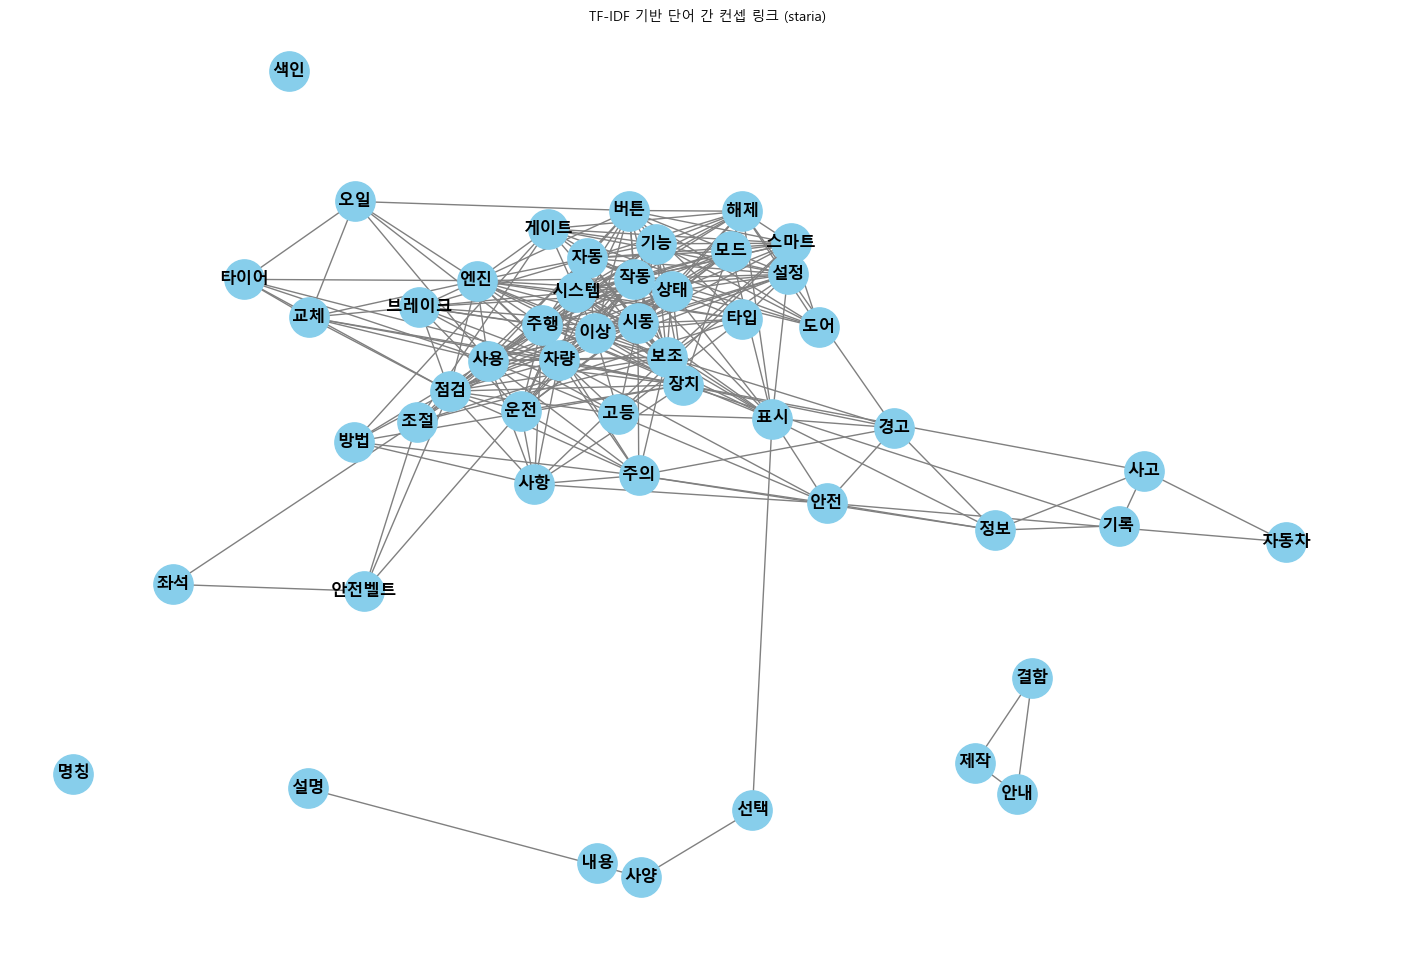

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. staria_top_50 단어 리스트와 인덱스 추출
staria_top_words = [word for word, score in staria_top_50]
staria_top_indices = [staria_vectorizer.vocabulary_[word] for word in staria_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
staria_word_vectors = staria_X[:, staria_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
staria_similarity_matrix = cosine_similarity(staria_word_vectors)

# 4. 네트워크 그래프 생성
staria_G = nx.Graph()

# 노드 추가
for word in staria_top_words:
    staria_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
staria_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(staria_top_words)):
    for j in range(i + 1, len(staria_top_words)):
        sim = staria_similarity_matrix[i][j]
        if sim >= staria_threshold:
            staria_G.add_edge(staria_top_words[i], staria_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
staria_pos = nx.spring_layout(staria_G, k=0.5, seed=42)
nx.draw_networkx_nodes(staria_G, staria_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    staria_G, staria_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(staria_G, staria_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (staria)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

staria['cut_off'] = staria['text'].apply(is_cut_off)
staria_cut = staria[staria['cut_off']]
print(staria_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = staria[staria['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


                                                 text
43  -\n작동 상태\nOTD059012\nOTD059012\n•  엔진 시동을 걸면 자...


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
staria['perplexity'] = staria['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = staria.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 50/50 [00:44<00:00,  1.12it/s]

                                                 text  perplexity
7   명칭으로 찾을 때\n점검 방법이\n어느 장에 있지\n목차를 활용하세요.\n이 스위치...  132.676989
0   안전 및 차량 손상 경고\n본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위...  105.900897
13  (제30조의3제1항 관련)\n이 자동차에는 사고기록장치가 장착되어 있습니다.\n사고...   90.270909
45  8\n̰ 주행 중 타이어에 펑크가 난 경우\n• 주행 중에 타이어에 펑크가 나면 비...   57.534477
43  -\n작동 상태\nOTD059012\nOTD059012\n•  엔진 시동을 걸면 자...   46.585420
10  (제50조 관련)\n자동차 제작자 등 (부품 제작자 등) : 현대자동차(주)\n주 ...   40.305210
14  목차\n안내 및 차량 정보 I 차량의 외관, 내관, 엔진룸, 차량 정보\n안전 및 ...   38.481871
27  인화성, 폭발성 물질 차내 방치 금지\n• 가연성 물질을 싣지 마십시오.\n• 여름...   37.168507
44  7\ni  알아두기\n인포테인먼트 소프트웨어 업데이트로 인해 운전자 보조 시스템의 ...   36.157329
40  하이패스 시스템 (ETCS)\nOUS4051050\nOUS4051050\n하이패스 ...   34.627748


In [16]:
a=[7,0]
for i in (a):
    print(staria.loc[i,'text'])
    print('='*50)

명칭으로 찾을 때
점검 방법이
어느 장에 있지
목차를 활용하세요.
이 스위치가
뭐지?
그림 목차 (내관도 I ) 를 활용하세요.
에어컨
사용 방법이
어디에 있지...
색인 (명칭) 목차를 활용하세요.
안전 및 차량 손상 경고
본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위험과 제품 사용에 대한 올바른 정보를 사전에 알 리는 안전 경고 표시입니다. 지시 사항은 반드시 숙지하여 지켜주십시오.
경고, 주의 표시
경고, 주의가 있는 문장 및 진하게 표시되어 있는 부분은 특히 유념하십시오.
주 의
차량이 고장나거나 손상될 우려가 있는 경우의 주의 표 시입니다.
경 고
사람이 다치거나 사망의 우려가 있는 경우의 경고 표시 입니다.
i  알아두기
차량 용어 또는 추가 설명이 필요한 정보 표시입니다.
안전을 위해 반드시 지켜야 하는 금지 표시입니다.


# 7번 인덱스 이상

100점 이상일 경우 부자연스러운 문장으로 간주

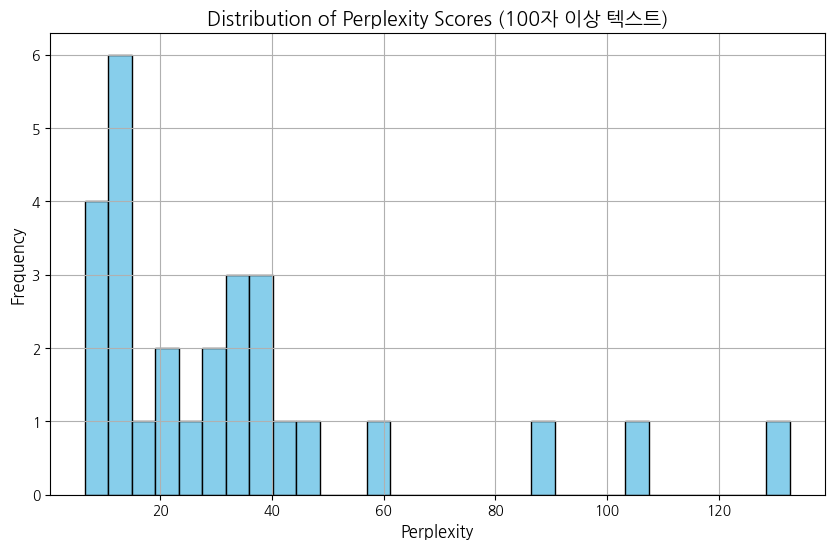

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = staria['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
